## Trait elements

In [262]:
%cd ../covid_households
import traits
import utilities
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import pandas as pd
from model_inputs import S80_P80_SAR_Inputs

plt.rcParams['pdf.fonttype']=42

model_inputs = S80_P80_SAR_Inputs(0.4, 0.4, 0.3).to_normal_inputs()
inf_trait = model_inputs['inf']

xmax = 4.0
grid_values = np.linspace(0.0, xmax, 200)
density = inf_trait.distribution.cdf(grid_values)
density_greater = 1-density
fraction_of_infections_least = [1-scipy.integrate.quad(lambda x: inf_trait.distribution.pdf(x) * x, 0, x0)[0] for x0 in grid_values]
fraction_of_infections_most = [scipy.integrate.quad(lambda x: inf_trait.distribution.pdf(x) * x, 0, x0)[0] for x0 in grid_values]

/Users/thayer/develop/covid_households/covid_households


In [263]:
df = pd.DataFrame({
    'relative infectivity':grid_values,
    #'cumulative density':density,
    'people at least this infectious':np.array(density_greater),
    'infections from people at least this infectious':np.array(fraction_of_infections_least)
})

In [264]:
#df['infections from people at most this infectious'] = 1 - df['infections from people at least this infectious']
df['pdf of relative infectivity'] = [inf_trait.distribution.pdf(x) for x in grid_values]
df = df.drop('people at least this infectious', axis=1)
#df = df.drop('infections from people at least this infectious', axis=1)
#df.drop('infections from people at most this infectious', axis=1)

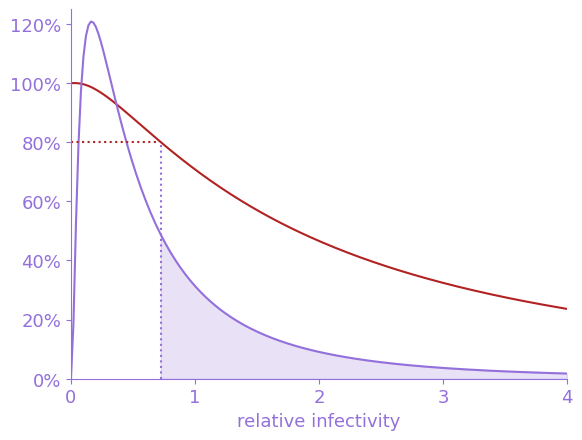

In [275]:
import seaborn as sns
base_color = 'mediumpurple'
highlight_color = 'firebrick'
plt.rcParams.update({'font.size': 13,})
ax = df.plot(x='relative infectivity', color=[highlight_color, base_color])
#ax = sns.plot(x='relative infectivity')

#ax.axhline(0.2, linestyle='dotted', xmax=0.7/xmax, color=highlight_color)
#ax.axvline(0.725, ymax=0.39, linestyle='dotted', color=base_color)


ax.axhline(0.8, linestyle='dotted', xmax=0.7/xmax, color=highlight_color)
ax.axvline(0.725, ymax=0.77/1.2, linestyle='dotted', color=base_color)


#ax.axhline(0.2, linestyle='dotted', xmax=1.6/xmax, color=highlight_color)
#ax.axvline(1.6, ymax=0.19/1.2, linestyle='dotted', color=highlight_color)


#ax.set_yticks([0.0, 0.4, 0.8, 1.0], ['0%', '40%', '80%', '100%'], color=base_color)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], ['0%', '20%', '40%', '60%', '80%', '100%', '120%'], color=base_color)
ax.set_ylim((0.0,1.25))

#ax.set_xticks([0,1,2,4], [0,1,2,4],color=base_color)
ax.set_xticks([0,1,2,3,4,5], [0,1,2,3,4,5],color=base_color)
ax.set_xlim((0.0,xmax))
ax.set_xlabel('relative infectivity', color=base_color)

from curlybrace.curlyBrace import curlyBrace
#curlyBrace(ax.figure, ax, (0.725,0.0),(0.725,0.4), str_text='$p_{80}$', color=base_color)

plt.legend(frameon=False)
#plt.setp(ax.get_legend().get_texts(), fontsize='10')
ax.get_legend().remove()

sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')

plt.fill_between(
        x=df['relative infectivity'], 
        y1=df['pdf of relative infectivity'], 
        where=df['relative infectivity']>=0.72,
        color= base_color,
        alpha= 0.2
)

plt.savefig('../figures/inf_visual.pdf', dpi=400)

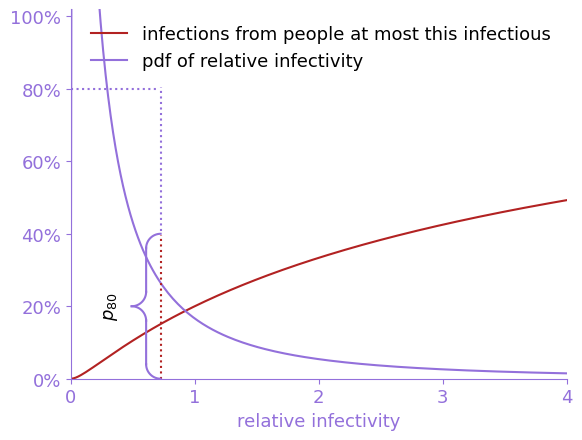

In [211]:
import seaborn as sns
base_color = 'mediumpurple'
highlight_color = 'firebrick'
plt.rcParams.update({'font.size': 13,})
ax = df.plot(x='relative infectivity', color=[highlight_color, base_color])
#ax = sns.plot(x='relative infectivity')
#ax.axvline(1.0)
ax.axhline(0.8, linestyle='dotted', xmax=0.7/xmax, color=base_color)
ax.axvline(0.725, ymax=0.39, linestyle='dotted', color=highlight_color)
ax.axvline(0.725, ymin=0.4, ymax=0.79, linestyle='dotted', color=base_color)


#ax.axhline(0.4, linestyle=(0, (1, 10)), color='red')



#ax.set_yticks([0.0, 0.4, 0.8, 1.0], ['0%', '40%', '80%', '100%'], color=base_color)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'], color=base_color)
ax.set_ylim((0.0,1.02))

#ax.set_xticks([0,1,2,4], [0,1,2,4],color=base_color)
ax.set_xticks([0,1,2,3,4,5], [0,1,2,3,4,5],color=base_color)
ax.set_xlim((0.0,xmax))
ax.set_xlabel('relative infectivity', color=base_color)

from curlybrace.curlyBrace import curlyBrace
curlyBrace(ax.figure, ax, (0.725,0.0),(0.725,0.4), str_text='$p_{80}$', color=base_color)

#plt.box(on=None)
#ax.set_axis_on()
ax.get_legend().remove()
plt.legend(frameon=False)
sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')
plt.savefig('../figures/inf_visual.pdf', dpi=400)

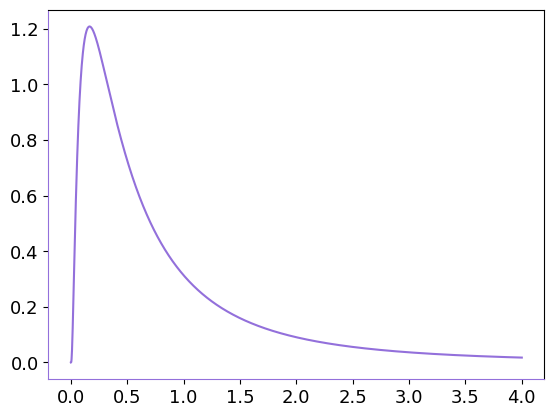

In [5]:
x = np.linspace(0.0, 4.0, 2000)
y = inf_trait.distribution.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y, color=base_color)
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
plt.savefig('../figures/inf_pdf.pdf', dpi=400)

In [303]:
import traits
import utilities
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import pandas as pd

model_inputs = S80_P80_SAR_Inputs(0.6, 0.8, 0.3).to_normal_inputs()

sus_trait = model_inputs['sus']

xmax = 4.0
grid_values = np.linspace(0.0, xmax, 100)
density = sus_trait.distribution.cdf(grid_values)
density_greater = 1-density
fraction_of_infections_least = [1-scipy.integrate.quad(lambda x: sus_trait.distribution.pdf(x) * x, 0, x0)[0] for x0 in grid_values]
fraction_of_infections_most = [scipy.integrate.quad(lambda x: sus_trait.distribution.pdf(x) * x, 0, x0)[0] for x0 in grid_values]

df = pd.DataFrame({
    'relative susceptibility':grid_values,
    #'cumulative density':density,
    'cumulative susceptibility':np.array(fraction_of_infections_most)
})

In [304]:
df['total susceptibility of people at least this susceptible'] = 1 - df['cumulative susceptibility']
df = df.drop('cumulative susceptibility', axis=1)

In [305]:
df['pdf of relative susceptibility'] = [sus_trait.distribution.pdf(x) for x in grid_values]

In [306]:
df

,relative susceptibility,total susceptibility of people at least this susceptible,pdf of relative susceptibility
0,0.000000,1.000000,0.000000
1,0.040404,1.000000,0.000028
2,0.080808,0.999998,0.003022
3,0.121212,0.999948,0.024722
4,0.161616,0.999653,0.082336
...,...,...,...
95,3.838384,0.023169,0.006326
96,3.878788,0.022210,0.005978
97,3.919192,0.021295,0.005651
98,3.959596,0.020420,0.005343


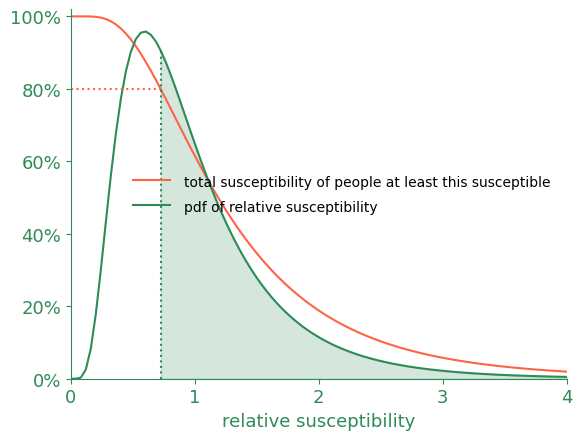

In [308]:
import seaborn as sns
base_color = 'seagreen'
highlight_color='tomato'

plt.rcParams.update({'font.size': 13,})
ax = df.plot(x='relative susceptibility', color=[highlight_color, base_color, 'brown'])

#ax.axhline(0.2, linestyle='dotted', xmax=0.76/xmax, color=highlight_color)
ax.axhline(0.8, linestyle='dotted', xmax=0.76/xmax, color=highlight_color)
ax.axvline(0.725, ymax=0.89, linestyle='dotted', color=base_color)

ax.set_yticks([0.0, 0.2, 0.6, 1.0], ['0%', '20%', '60%', '100%'], color=base_color)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'], color=base_color)
ax.set_ylim((0.0,1.02))

ax.set_xticks([0,1,2,3,4,5], [0,1,2,3,4,5],color=base_color)
ax.set_xlim((0.0,xmax))
ax.set_xlabel('relative susceptibility', color=base_color)

#from curlybrace.curlyBrace import curlyBrace
#curlyBrace(ax.figure, ax,(0.725,0.0),(0.725,0.6), str_text='$s_{80}$', color=base_color)

#plt.box(on=None)
#ax.set_axis_on()
plt.legend(frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize='10') 
ax.get_legend().remove()

sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')

plt.fill_between(
        x=df['relative susceptibility'], 
        y1=df['pdf of relative susceptibility'], 
        where=df['relative susceptibility']>=0.72,
        color= base_color,
        alpha= 0.2
)

plt.savefig('../figures/sus_visual.pdf', dpi=400)

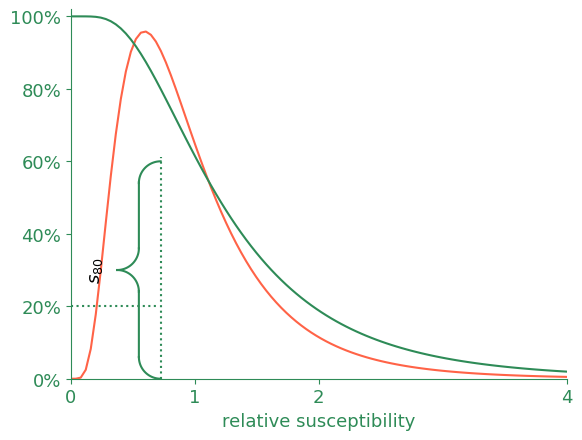

In [293]:
import seaborn as sns
base_color = 'seagreen'
plt.rcParams.update({'font.size': 13,})
ax = df.plot(x='relative susceptibility', color=['tomato', base_color])
#ax = sns.plot(x='relative infectivity')
#ax.axvline(1.0)
ax.axhline(0.2, linestyle='dotted', xmax=0.7/xmax, color=base_color)
ax.axvline(0.725, ymax=0.6, linestyle='dotted', color=base_color)
#ax.axhline(0.4, linestyle=(0, (1, 10)), color='red')



ax.set_yticks([0.0, 0.2, 0.6, 1.0], ['0%', '20%', '60%', '100%'], color=base_color)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'], color=base_color)
ax.set_ylim((0.0,1.02))

ax.set_xticks([0,1,2,3,4,5], [0,1,2,3,4,5],color=base_color)
ax.set_xticks([0,1,2,4], [0,1,2,4],color=base_color)
ax.set_xlim((0.0,xmax))
ax.set_xlabel('relative susceptibility', color=base_color)

from curlybrace.curlyBrace import curlyBrace
curlyBrace(ax.figure, ax,(0.725,0.0),(0.725,0.6), str_text='$s_{80}$', color=base_color)

#plt.box(on=None)
#ax.set_axis_on()
plt.legend(frameon=False)
ax.get_legend().remove()

sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')
plt.savefig('../figures/sus_visual.pdf', dpi=400)

In [37]:
df['1 - cumulative susceptibility'] = 1 - df['cumulative susceptibility']
df = df.drop('cumulative susceptibility', axis=1)

df

,relative susceptibility,people at least this susceptible,1 - cumulative susceptibility
0,0.000000,1.000000,1.000000
1,0.040404,1.000000,1.000000
2,0.080808,0.999966,0.999998
3,0.121212,0.999504,0.999948
4,0.161616,0.997476,0.999653
...,...,...,...
95,3.838384,0.004932,0.023169
96,3.878788,0.004683,0.022210
97,3.919192,0.004448,0.021295
98,3.959596,0.004226,0.020420


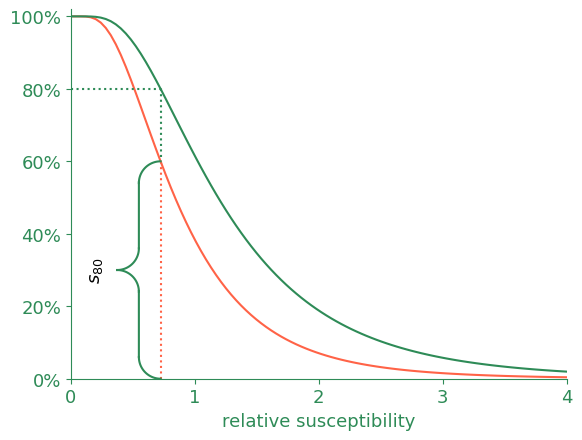

In [38]:
import seaborn as sns
base_color = 'seagreen'
plt.rcParams.update({'font.size': 13,})


ax = df.plot(x='relative susceptibility', color=['tomato', base_color])
#ax = sns.plot(x='relative infectivity')
#ax.axvline(1.0)
ax.axhline(0.8, linestyle='dotted', xmax=0.74/xmax, color=base_color)
ax.axvline(0.725, ymax=0.59, linestyle='dotted', color='tomato')
ax.axvline(0.725, ymin=0.60, ymax=0.79, linestyle='dotted', color=base_color)

#ax.axhline(0.4, linestyle=(0, (1, 10)), color='red')



ax.set_yticks([0.0, 0.2, 0.6, 1.0], ['0%', '20%', '60%', '100%'], color=base_color)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'], color=base_color)
ax.set_ylim((0.0,1.02))

ax.set_xticks([0,1,2,3,4,5], [0,1,2,3,4,5],color=base_color)
ax.set_xlim((0.0,xmax))
ax.set_xlabel('relative susceptibility', color=base_color)

from curlybrace.curlyBrace import curlyBrace
curlyBrace(ax.figure, ax,(0.725,0.0),(0.725,0.6), str_text='$s_{80}$', color=base_color)

#plt.box(on=None)
#ax.set_axis_on()
plt.legend(frameon=False)
ax.get_legend().remove()

sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')
plt.savefig('../figures/sus_visual.pdf', dpi=400)

In [39]:
sus_trait
inf_trait
print(scipy.integrate.quad(lambda x: sus_trait.distribution.pdf(x) * x, 0, 0.725)[0])
print(scipy.integrate.quad(lambda x: inf_trait.distribution.pdf(x) * x, 0, 0.725)[0])

0.200231918204341
0.20012457769555067


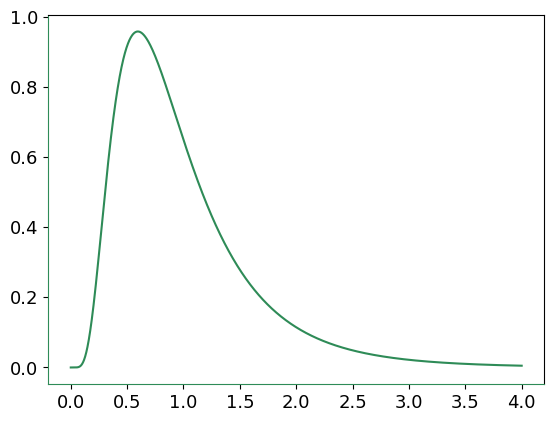

In [14]:
x = np.linspace(0.0, 4.0, 2000)
y = sus_trait.distribution.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y, color=base_color)
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
plt.savefig('../figures/sus_pdf.pdf', dpi=400)

## State lengths elements

    Latent period (days)   Density
0                0.00000  0.000000
1                0.10101  0.000008
2                0.20202  0.000631
3                0.30303  0.004651
4                0.40404  0.015068
..                   ...       ...
95               9.59596  0.010815
96               9.69697  0.010376
97               9.79798  0.009956
98               9.89899  0.009555
99              10.00000  0.009172

[100 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


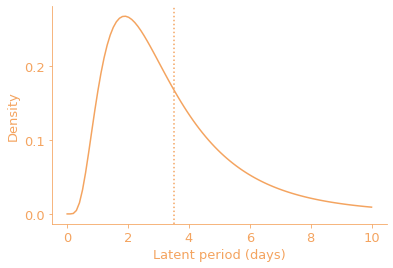

In [7]:
from state_lengths import lognormal_DISTS
import constants

base_color = 'sandybrown'
plt.rcParams.update({'font.size': 13,})
grid_values = np.linspace(0.0, 10.0, 100)
evaluated_pdf = lognormal_DISTS[constants.STATE.exposed].distribution.pdf(grid_values)

df = pd.DataFrame({
    'Latent period (days)': grid_values,
    'Density': evaluated_pdf
})
print(df)

ax = df.plot(x='Latent period (days)', color=base_color)
print(ax)
plt.axvline(3.5, linestyle='dotted', color=base_color)

sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')
plt.legend('',frameon=False)

ax.set_yticks([0.0, 0.1, 0.2], color=base_color)
ax.set_ylabel('Density', color=base_color)

ax.set_xlabel(ax.get_xlabel(), color=base_color)
plt.savefig('/Users/thayer/Desktop/fig3.png', dpi=800)

    Infectious period (days)       Density
0                   0.000000  0.000000e+00
1                   0.151515  1.780684e-17
2                   0.303030  1.161789e-11
3                   0.454545  7.280943e-09
4                   0.606061  3.769208e-07
..                       ...           ...
95                 14.393939  4.010581e-03
96                 14.545455  3.727170e-03
97                 14.696970  3.464081e-03
98                 14.848485  3.219854e-03
99                 15.000000  2.993130e-03

[100 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


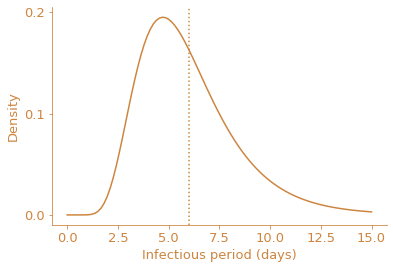

In [8]:
from state_lengths import lognormal_DISTS
import constants

base_color = 'peru'

plt.rcParams.update({'font.size': 13,})
grid_values = np.linspace(0.0, 15.0, 100)
evaluated_pdf = lognormal_DISTS[constants.STATE.infectious].distribution.pdf(grid_values)

df = pd.DataFrame({
    'Infectious period (days)': grid_values,
    'Density': evaluated_pdf
})
print(df)

ax = df.plot(x='Infectious period (days)', color=base_color)
print(ax)
plt.axvline(6.0, linestyle='dotted', color=base_color)

sns.despine()
ax.spines['bottom'].set_color(base_color)
ax.spines['left'].set_color(base_color)
ax.tick_params(colors=base_color, which='both')
plt.legend('',frameon=False)

ax.set_yticks([0.0, 0.1, 0.2], color=base_color)
ax.set_ylabel('Density', color=base_color)

ax.set_xlabel(ax.get_xlabel(), color=base_color)
plt.savefig('/Users/thayer/Desktop/fig4.png', dpi=800)